In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurances = pd.read_csv('Data/insurances.csv')

In [3]:
insurances.head()

,wiek,plec,bmi,dzieci,palacz,region,kwota
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wiek    1338 non-null   int64  
 1   plec    1338 non-null   object 
 2   bmi     1338 non-null   float64
 3   dzieci  1338 non-null   int64  
 4   palacz  1338 non-null   object 
 5   region  1338 non-null   object 
 6   kwota   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurances.describe(include='all')

,wiek,plec,bmi,dzieci,palacz,region,kwota
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
insurances.shape

(1338, 7)

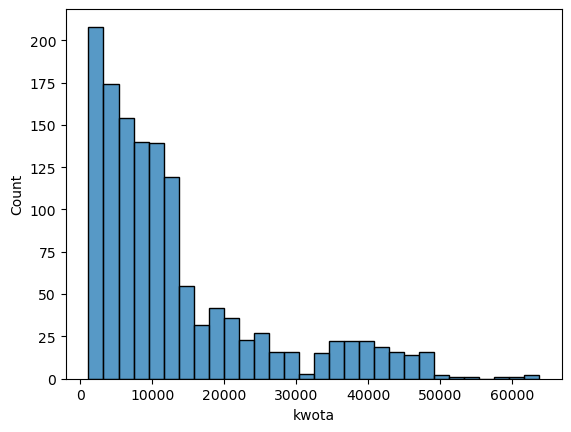

In [7]:
sns.histplot(data=insurances, x='kwota')
plt.show()

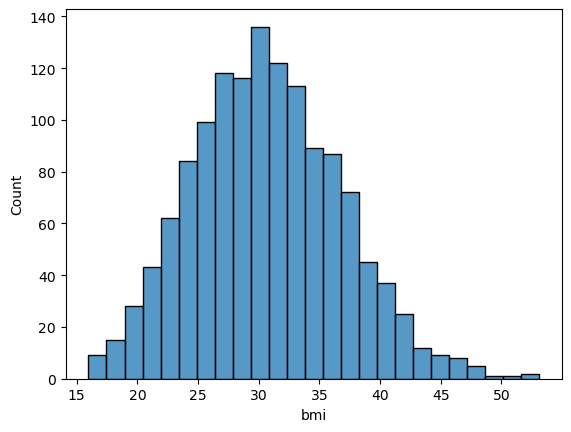

In [8]:
sns.histplot(data=insurances, x='bmi')
plt.show()

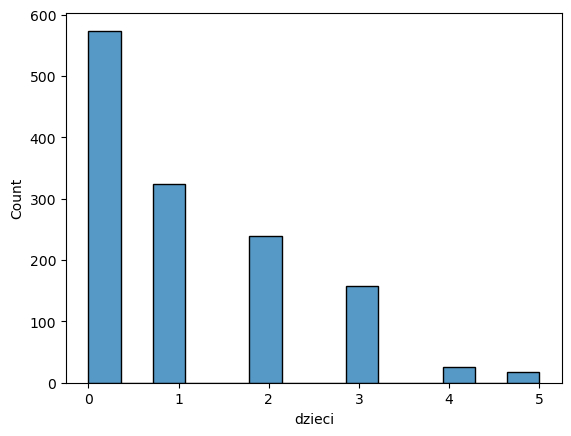

In [9]:
sns.histplot(data=insurances, x='dzieci')
plt.show()

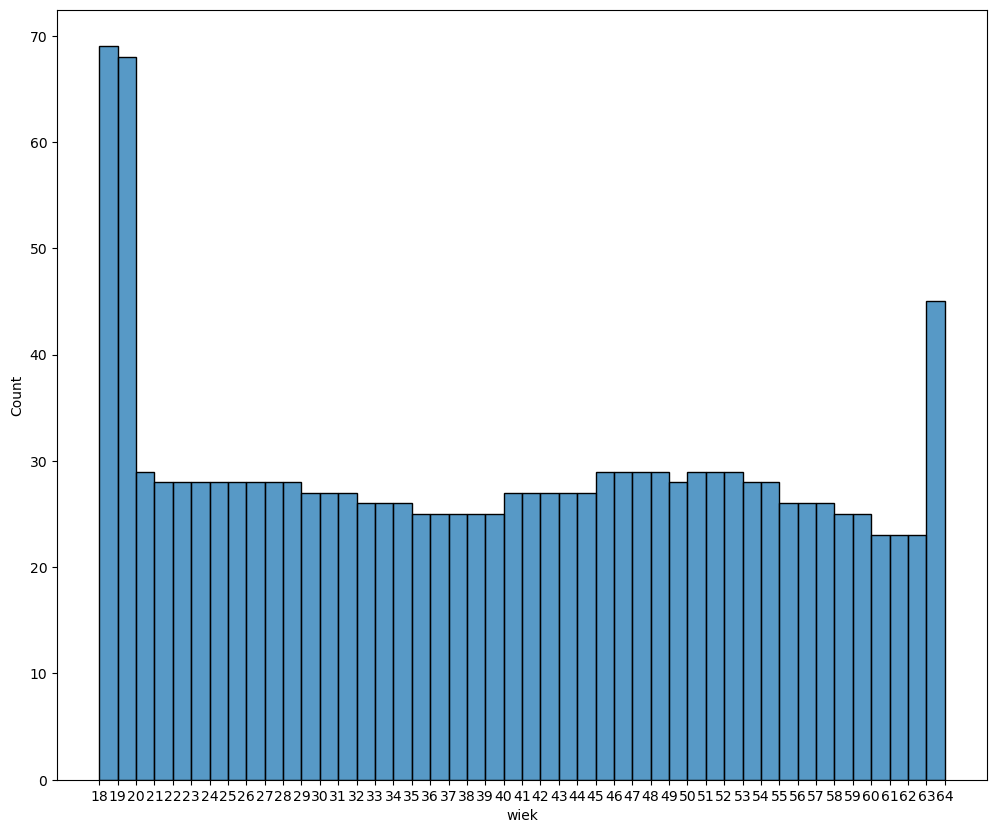

In [10]:
plt.figure(figsize=(12,10))
sns.histplot(data = insurances, x='wiek', binwidth=1)
plt.xticks(np.arange(insurances['wiek'].min(), insurances['wiek'].max()+1, 1))
plt.show()

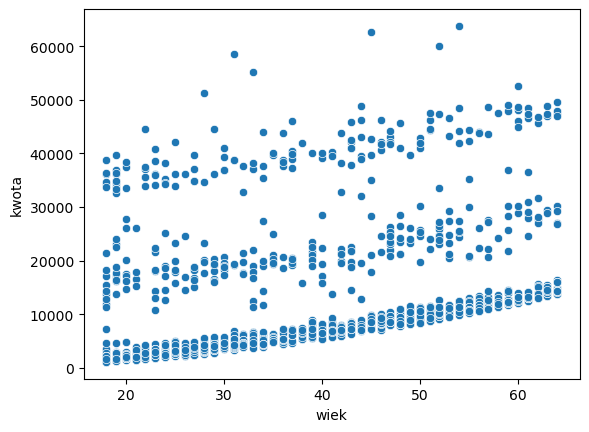

In [11]:
sns.scatterplot(data=insurances, x='wiek', y='kwota')
plt.show()


In [12]:
insurances['wiek'].corr(insurances['kwota'])

0.29900819333064765

In [13]:
insurances = pd.get_dummies(data=insurances, columns=['plec', 'region'], prefix='czy')
boolean = {'yes': 1, 'no': 0}
insurances['palacz'] = insurances['palacz'].map(boolean)

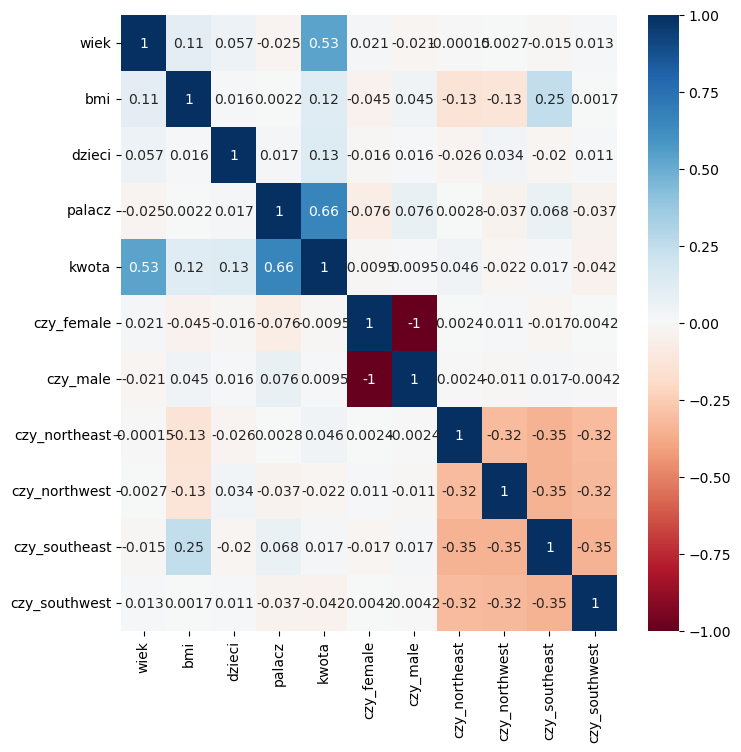

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(insurances.corr(method='spearman'), annot=True, cmap='RdBu')
plt.show()

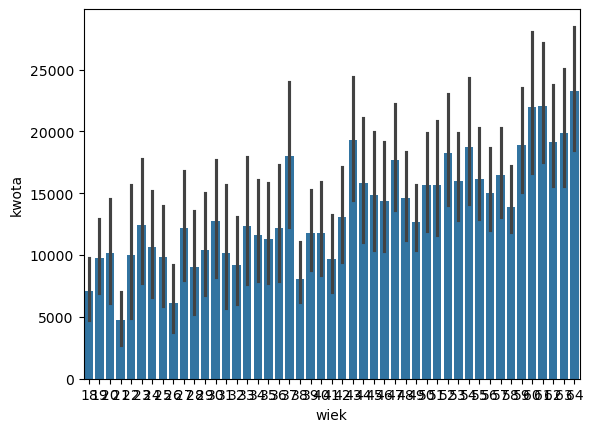

In [15]:
sns.barplot(data=insurances, x='wiek', y='kwota')
plt.show()

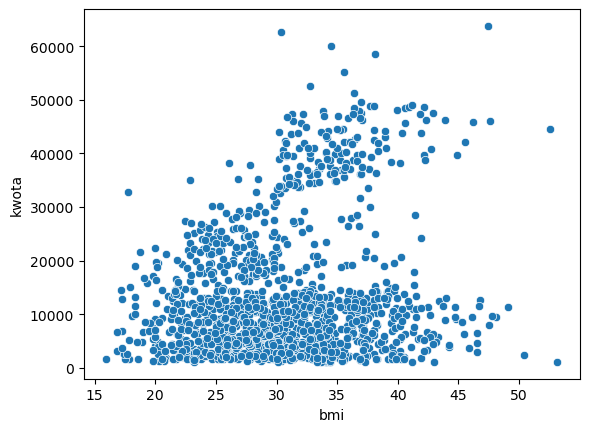

In [16]:
sns.scatterplot(data=insurances, x='bmi', y='kwota')
plt.show()

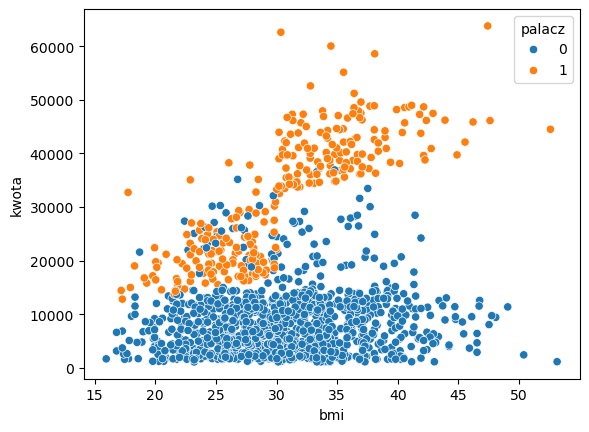

In [17]:
sns.scatterplot(data=insurances, x='bmi', y='kwota', hue='palacz')
plt.show()

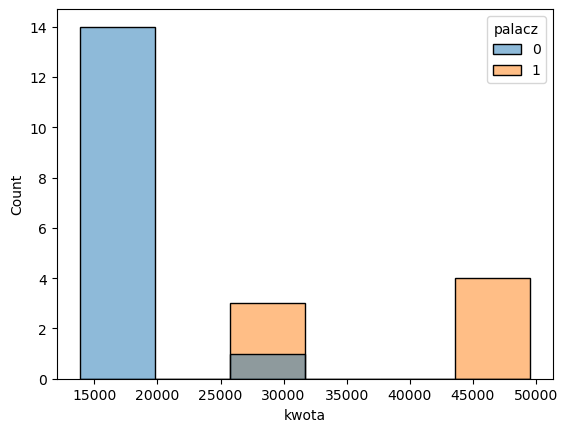

In [18]:
sns.histplot(data=insurances[insurances['wiek']==64], x='kwota', hue='palacz')
plt.show()

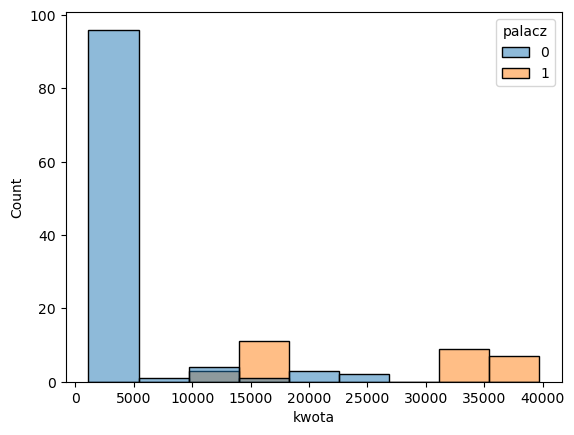

In [19]:
sns.histplot(data=insurances[insurances['wiek'].isin([18,19])], x='kwota', hue='palacz')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [21]:
X = insurances.drop(['kwota', 'czy_northwest', 'czy_northeast', 'czy_southwest', 'czy_southwest'], axis=1)
y = insurances['kwota']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_prepared = scaler.fit_transform(X_train)
X_test_prepared = scaler.fit_transform(X_test)

In [24]:
def summary(model):
    y_pred = model.predict(X_test_prepared)
    R2 = r2_score(y_test, y_pred)
    MSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)
    print('R2: '+str(R2))
    print('MSE: '+str(MSE))
    print('MAE: '+str(MAE))

In [25]:
lr = LinearRegression()
lr.fit(X_train_prepared, y_train)
summary(lr)


R2: 0.7144681622282969
MSE: 6196.273004477257
MAE: 4360.261121956595


In [26]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
lasso = Lasso()
ridge = Ridge()

In [27]:
lasso.fit(X_train_prepared, y_train)
summary(lasso)

R2: 0.7145038719530437
MSE: 6195.885527333307
MAE: 4359.838869131124


In [28]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring = 'neg_mean_squared_error', refit=False)
clf.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             refit=False, scoring='neg_mean_squared_error')

In [29]:
best_alpha = clf.best_params_['alpha']
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train_prepared, y_train)
summary(best_lasso)

R2: 0.7144681658013357
MSE: 6196.272965708334
MAE: 4360.261080013302


In [30]:
ridge.fit(X_train_prepared, y_train)
summary(ridge)

R2: 0.7146005318002462
MSE: 6194.8365743184895
MAE: 4360.30036811469


In [31]:
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, scoring = 'neg_mean_squared_error', refit=False)
clf.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             refit=False, scoring='neg_mean_squared_error')

In [32]:
best_alpha = clf.best_params_['alpha']
best_ridge = Lasso(alpha=best_alpha)
best_ridge.fit(X_train_prepared, y_train)
summary(best_ridge)

R2: 0.7144681658013357
MSE: 6196.272965708334
MAE: 4360.261080013302


In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_prepared, y_train)
summary(rfr)

R2: 0.8192684622063078
MSE: 4929.697220426123
MAE: 2715.8311077767758


In [34]:
param_grid = [
    {'n_estimators' : [45, 50, 55], 'max_features' : [3, 4, 5]}
]

grid_search = GridSearchCV(rfr, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(X_train_prepared, y_train)
grid_search.best_params_

{'max_features': 4, 'n_estimators': 55}

In [35]:
grid_search.best_estimator_.fit(X_train_prepared, y_train)
summary(grid_search.best_estimator_)

R2: 0.823162576096933
MSE: 4876.299408979031
MAE: 2695.3335684771237


In [43]:
from sklearn.svm import SVR

In [50]:
param_grid_svr = [
    {'kernel' : ["linear", "rbf", "sigmoid"],
    'C' : np.linspace(0.001, 100, 10)},
    {'kernel' : ['poly'],
     'C' : np.linspace(0.001, 100, 10),
    'degree' : np.arange(2,6,1)}
]

In [51]:
gridSVR = GridSearchCV(SVR(), param_grid=param_grid_svr, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True)
gridSVR.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': array([1.0000e-03, 1.1112e+01, 2.2223e+01, 3.3334e+01, 4.4445e+01,
       5.5556e+01, 6.6667e+01, 7.7778e+01, 8.8889e+01, 1.0000e+02]),
                          'kernel': ['linear', 'rbf', 'sigmoid']},
                         {'C': array([1.0000e-03, 1.1112e+01, 2.2223e+01, 3.3334e+01, 4.4445e+01,
       5.5556e+01, 6.6667e+01, 7.7778e+01, 8.8889e+01, 1.0000e+02]),
                          'degree': array([2, 3, 4, 5]), 'kernel': ['poly']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
gridSVR.best_estimator_.fit(X_train_prepared, y_train)
summary(gridSVR.best_estimator_)

R2: 0.6648960961764827
MSE: 6712.634761494985
MAE: 3498.741834799826
